# Machine Learning Mid-term Project
## Team members:
 - ## <span style="color:cyan">521H0493: Trần Nguyễn Duy Bảo</span>.
 - ## <span style="color:cyan">521h0517: Hoàng Đình Quý Vũ</span>.
 - ## <span style="color:cyan">521H0511: Nguyễn Hoàng Phúc</span>.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data content

1 ID number <br>
2 Diagnosis (M = malignant, B = benign)
3-32.

Ten real-valued features are computed for each cell nucleus:

    a. radius (mean of distances from center to points on the perimeter)
    b. texture (standard deviation of gray-scale values)
    c. perimeter
    d. area
    e. smoothness (local variation in radius lengths)
    f. compactness (perimeter^2 / area - 1.0)
    g. concavity (severity of concave portions of the contour)
    h. concave points (number of concave portions of the contour)
    i. symmetry
    j. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.<br>

For instance:
- field 3 is Mean Radius
- field 13 is Radius SE
- field 23 is Worst Radius.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import svm
from sklearn import metrics

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.drop('id',axis = 1,inplace=True)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
features_mean= data.columns[1:11]
features_se= data.columns[11:20]
features_worst=data.columns[21:31]
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
-----------------------------------
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se'],
      dtype='object')
------------------------------------
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0}) # 0 is second phase, 1 is fourth pahse
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Data Visualization

In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot: >

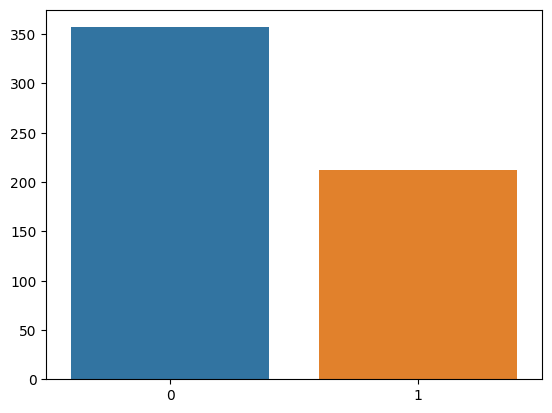

In [11]:
sns.barplot(x=data['diagnosis'].value_counts().index, y = data['diagnosis'].value_counts().values)

## Let's check correlation between <span style='color:pink'>"mean"</span> value feature

<AxesSubplot: >

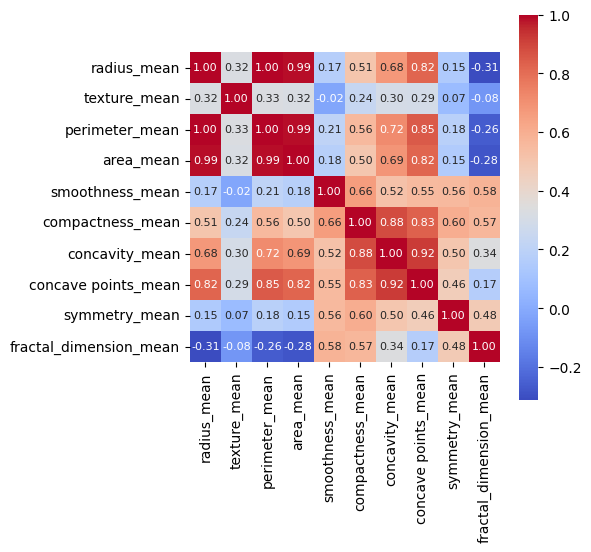

In [12]:
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

By observation:
- the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
- compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
- so selected Parameter for use is <span style="color:yellow">perimeter_mean, texture_mean, compactness_mean, symmetry_mean</span>

# Data modeling

In [13]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var= "diagnosis"

In [14]:
from sklearn.preprocessing import MinMaxScaler
def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return scaler.transform(X)

In [15]:
data = data[prediction_var + [outcome_var]]
data[prediction_var] = scale(data[prediction_var])

In [16]:
train, test = train_test_split(data, test_size = 0.2, random_state=42)
print(train.shape)
print(test.shape)

(455, 6)
(114, 6)


In [17]:
train_x = train[prediction_var]
train_y=train.diagnosis
test_x= test[prediction_var]
test_y =test.diagnosis

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def classification_model(model,train_x,train_y,test_x,test_y):
    
    model.fit(train_x,train_y)
    
    predictions = model.predict(test_x)
    labels = [0, 1]
    precision = metrics.precision_score(predictions,test_y)
    loss = metrics.log_loss(predictions,test_y, labels=labels)
    print("Precision : %s" % "{0:.3%}".format(precision))
    print("Log los : %s" % "{0:.03}".format(loss))
    print('Confusion matrix : ')
    print(confusion_matrix(test_y,predictions))
    print(classification_report(test_y,predictions))
    return precision,loss
 

# MODELS:

## Firstly, we will try some classification models

## Decision Tree Classifier

In [19]:
model = DecisionTreeClassifier()
model_decision_tree_classifier = classification_model(model,train_x,train_y,test_x,test_y)

Precision : 90.698%
Log los : 2.53
Confusion matrix : 
[[67  4]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## KNN unweighted

In [20]:
model = KNeighborsClassifier(n_neighbors = 3)
model_UnweightedKnn_classifier = classification_model(model,train_x,train_y,test_x,test_y)

Precision : 90.698%
Log los : 2.53
Confusion matrix : 
[[67  4]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## KNN weighted

In [21]:
model = KNeighborsClassifier(n_neighbors = 3,weights='distance')
model_WeightedKnn_classifier = classification_model(model,train_x,train_y,test_x,test_y)

Precision : 90.698%
Log los : 2.53
Confusion matrix : 
[[67  4]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Gaussian Naive Bayes 

In [22]:
model = GaussianNB()
model_Gaussian_classifier = classification_model(model,train_x,train_y,test_x,test_y)

Precision : 83.721%
Log los : 2.85
Confusion matrix : 
[[69  2]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



## Random forest

In [23]:
model = RandomForestClassifier(n_estimators=100)
model_randomforest_classifier = classification_model(model,train_x,train_y,test_x,test_y)

Precision : 93.023%
Log los : 1.9
Confusion matrix : 
[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



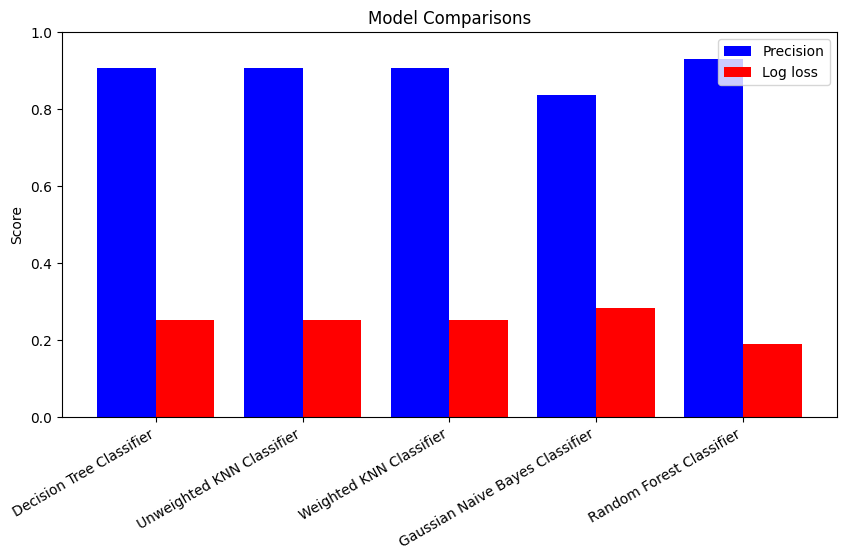

In [24]:
import matplotlib.pyplot as plt

models = [model_decision_tree_classifier, model_UnweightedKnn_classifier, model_WeightedKnn_classifier, model_Gaussian_classifier, model_randomforest_classifier]
model_names = ['Decision Tree Classifier', 'Unweighted KNN Classifier', 'Weighted KNN Classifier', 'Gaussian Naive Bayes Classifier', 'Random Forest Classifier']
precision = [m[0] for m in models]
loss = [m[1]/10 for m in models] # loss is scale down by 10 to fit in the graph
x_ticks = [i for i in range(len(models))]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x_ticks, precision, width=0.4, color='b', label='Precision')
ax.bar([i + 0.4 for i in x_ticks], loss, width=0.4, color='r', label='Log loss')

ax.set_xticks([i + 0.2 for i in x_ticks])
ax.set_xticklabels(model_names, rotation=30, ha='right')

ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Model Comparisons')
ax.legend()

plt.show()

# MODELS:
## Lastly, we will try some regression models

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def regression_model(model,train_x,train_y,test_x,test_y):
    
    model.fit(train_x,train_y)
    
    predictions = model.predict(test_x)
    
    r2 = metrics.r2_score(predictions,test_y)
    rmse = metrics.mean_squared_error(predictions, test_y, squared=False)
    mae = metrics.mean_absolute_error(predictions,test_y)
    print("R2 score : %s" % "{0:.3%}".format(r2))
    print("Mean Absolute Eror : %s" % "{0:.03}".format(mae))
    print("Root Mean Squared Eror : %s" % "{0:.03}".format(rmse))
    return r2,rmse,mae
 

## Linear regression

In [26]:
model = LinearRegression()
model_LinearRegression = regression_model(model,train_x,train_y,test_x,test_y)

R2 score : 47.481%
Mean Absolute Eror : 0.237
Root Mean Squared Eror : 0.285


## Unweigted KNN regression

In [27]:
model = KNeighborsRegressor()
model_UnweightedKnn_regressor = regression_model(model,train_x,train_y,test_x,test_y)

R2 score : 74.074%
Mean Absolute Eror : 0.0982
Root Mean Squared Eror : 0.22


## Distance Weighted KNN regression

In [28]:
model = KNeighborsRegressor()
model_WeightedKnn_regressor = regression_model(model,train_x,train_y,test_x,test_y)

R2 score : 74.074%
Mean Absolute Eror : 0.0982
Root Mean Squared Eror : 0.22


## Decision Tree regression

In [29]:
model = DecisionTreeRegressor()
model_decision_tree_regressor = regression_model(model,train_x,train_y,test_x,test_y)

R2 score : 62.660%
Mean Absolute Eror : 0.0877
Root Mean Squared Eror : 0.296


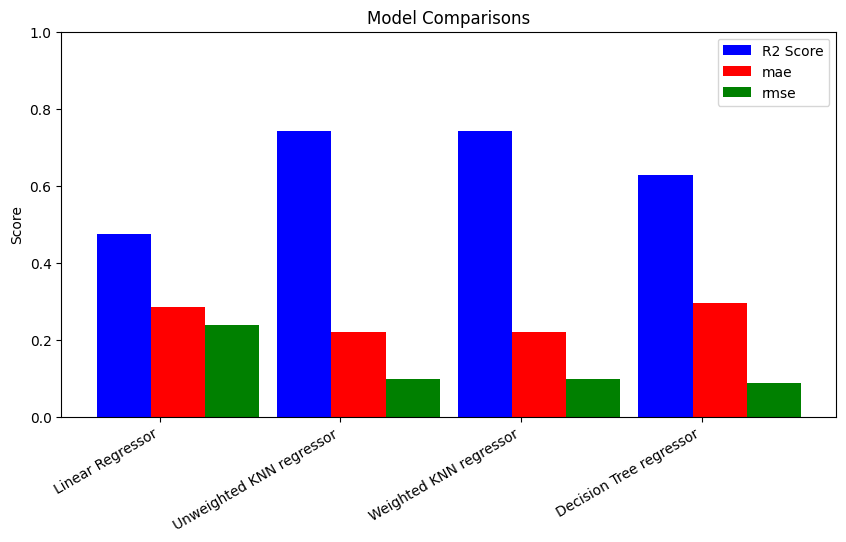

In [30]:
import matplotlib.pyplot as plt

models = [model_LinearRegression, model_UnweightedKnn_regressor, model_WeightedKnn_regressor,model_decision_tree_regressor]
model_names = ['Linear Regressor', 'Unweighted KNN regressor', 'Weighted KNN regressor', 'Decision Tree regressor']
R2 = [m[0] for m in models]
mae = [m[1] for m in models]
rmse = [m[2] for m in models]
x_ticks = [i for i in range(len(models))]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x_ticks, R2, width=0.3, color='b', label='R2 Score')
ax.bar([i + 0.3 for i in x_ticks], mae, width=0.3, color='r', label='mae')
ax.bar([i + 0.6 for i in x_ticks], rmse, width=0.3, color='g', label='rmse')

ax.set_xticks([i + 0.2 for i in x_ticks])
ax.set_xticklabels(model_names, rotation=30, ha='right')

ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Model Comparisons')
ax.legend()

plt.show()
